### Visual Servoing
1. 

#### Camera model
1. A pinhole camera can be modeled as the following: 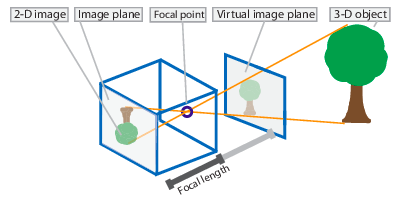
2. To begin using a camera, it need to be calibrated such that a mathematical relationship between a given world point and a image point is established. 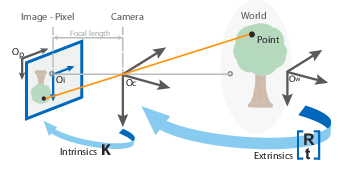

#### Camera calibration
1. Camera calibration determines both the intrinsic and extrinsic parameters. The extrinsic parameters involve a rigid body transformation between the world coordintes and the camera coordinates. The intrinsic parameters involve a projective transformation from the camera coordinates to the pixel coordinates. 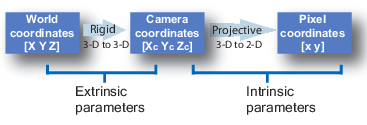
2. The instrinsic parameters include the focal length, the optical center (aka principal point) and the skew coefficient. We can compactly define them to be: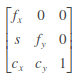
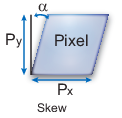
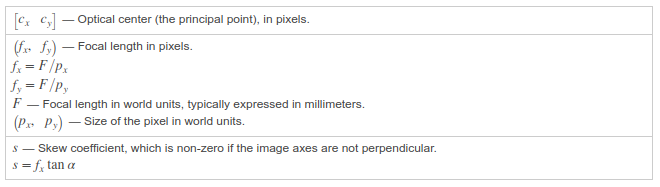
3. Due to distortion of the light rays going through the lens, we often need to undistort the image. This is done thorugh a simple polynomial mapping of al the points.

#### IBVS
1. IBVS involves tracking of the feature points $s$, which can be points, lines, polygonal areas etc. The spatial velocity of the camera $\nu_c = (v_c, \omega_c)$ is related to the feature point's velocity via $\dot s = L_s \nu_c$ where $L_s \in \mathbb{R}^{k \times 6}$. We can now define the errors as $e = s-s^*$ and $e = L_s \nu_c$ assuming $\dot s^* = 0$. Clearly, $k \geq 6$ to have a well-defined behavior, i.e. at least three feature points will be needed

2. The velocity of the feature points can be related to the camera's spatial velocity via: $\dot x = L_x \nu_c$ where $L_x = \begin{pmatrix} -1/Z & 0 & x/Z & xy & -(1+x^2) & y \\ 0 & -1/Z & y/Z & 1+y^2 & -xy & -x \end{pmatrix}$. To achieve exponential decrease in error, we have $\nu_c = L_e^+ \dot e = L_e^+ (-\lambda e)$

3. In practice, it is impossible to know perfectly in practise either $L_e$ or $L_e^+$ and they need to be estimated. As such, our control law is $\nu_c = \hat{L_e^+} (-\lambda e)$, resulting in the error dynamics $\dot e = -\lambda L_e \hat{L_e^+} e$. Note that $L_e \hat{L_e^+} \neq I$

4. The interaction matrix can be numerically estimation of offline or online schemes. Given that $L_s^+ \Delta s = \Delta \nu_c$, we can compute $\hat{L_s^+} = AB^+$ using linear least squares. A recursive method can also be used. The estimation can also be considered as an optimization problem using Broyden's update rule $\hat{L_s(t+1)} = \hat{L_s(t)} + \frac{\alpha}{\Delta \nu_c^T \Delta \nu_c} [\Delta x - \hat{L_s(t)} \Delta \nu_c] \Delta \nu_c^T $ where $\alpha$ is the update rate. The drawback of these methods is that no theoretical stability and robustness analysis can be made.

#### PBVS
1. PBVS use the pose of the camera with respect to some reference coordinate frame to define $s$. Computing this pose from a set of measurements in one image necessitates the camera intrinsic parameters and the 3d model of the object observed to be known. This classic computer vision problem is called the 3d localization problem.

2. We can define $s = (t, \theta u)$ to be the "feature" to be tracked. Thus, we have $s = (^c t_o, \theta u)$
 and $s^* = (^{c^*}t_o, 0)$. Clearly, PBVS is moving the robot such that $e=(^c t_o - ^{c^*}t_o, \theta u)$ converges to 0. $L_e = \begin{pmatrix} -I_3 & [^c t_o]_\times \\ 0 & L_{\theta u}\end{pmatrix}$. Using $\nu_c = -\lambda \hat{L_e^{-1}} e$, we arrive at $v_c = -\lambda [^{c^*}t_o - ^c t_o] + [^c t_o]_\times \theta u$ and $\omega_c = -\lambda \theta u$. Clearly, this does not result in a straight line trajectory.
 
3. An alternative method is to use $s = (^{c^*}t_c, \theta u)$, $s^* = (0,0)$, and thus $e = s$. Using $L_e = \begin{pmatrix} ^{c^*}R_c & 0 \\ 0 & L_{\theta u} \end{pmatrix}$, we have a simpler control scheme $v_c = -\lambda (^{c^*}R_c)^T (^{c^*}t_c)$ and $\omega_c = -\lambda \theta u$. Now, the camera trajectory is a pure straight line.

#### References
1. Handbook of robotics, 2nd ed, Chapter 24